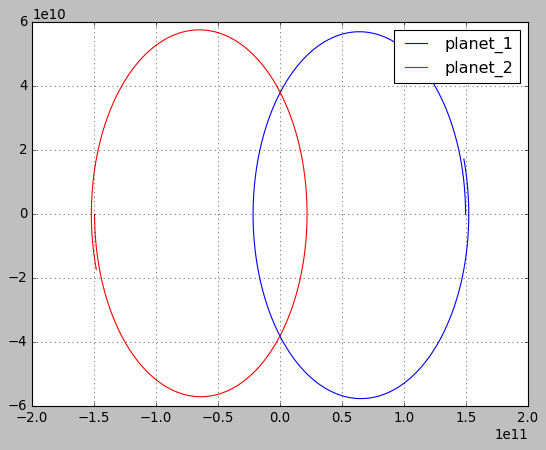

In [22]:
#Задача №3.
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
###############################################################################################
def Force(G,M,r_vector,r):
    ''' Сила '''
    return G*M*r_vector/r**3
def Solver_Eiler(Number,Time_Step,Points_1_old,Points_2_old,Speed_1_old,Speed_2_old,m_1,m_2,G):
    Points_1 = [[0 for i in range(Number)] for j in range(2)] #X,Y 1
    Points_2 = [[0 for i in range(Number)] for j in range(2)] #X,Y 2
    Speed_1 = [[0 for i in range(Number)] for j in range(2)] #Ux,Uy 1
    Speed_2 = [[0 for i in range(Number)] for j in range(2)] #Ux,Uy 2
    for i in range(2):
                 Points_1[i][0] = Points_1_old[i]
                 Speed_1[i][0] = Speed_1_old[i]
                 Points_2[i][0] = Points_2_old[i]
    Speed_2[0][0] = Speed_2_old[0]
    Speed_2[1][0] = Speed_2_old[1]
    for i in range(1,Number):
            
        Points_1[0][i] = Points_1[0][i-1] + Time_Step*Speed_1[0][i-1] # X1
        Points_1[1][i] = Points_1[1][i-1] + Time_Step*Speed_1[1][i-1] # Y1
        
        Points_2[0][i] = Points_2[0][i-1] + Time_Step*Speed_2[0][i-1] # X2
        Points_2[1][i] = Points_2[1][i-1] + Time_Step*Speed_2[1][i-1] # Y2
                 
        r = ((Points_2[0][i-1] - Points_1[0][i-1])**2 + (Points_2[1][i-1] - Points_1[1][i-1])**2)**0.5 #r
        
        Speed_1[0][i] = Speed_1[0][i-1] - Time_Step*Force(G,m_2,Points_1[0][i-1] - Points_2[0][i-1],r) # Ux1
        Speed_1[1][i] = Speed_1[1][i-1] - Time_Step*Force(G,m_2,Points_1[1][i-1] - Points_2[1][i-1],r) # Uy1
        
        Speed_2[0][i] = Speed_2[0][i-1] - Time_Step*Force(G,m_1,Points_2[0][i-1] - Points_1[0][i-1],r) # Ux2
        Speed_2[1][i] = Speed_2[1][i-1] - Time_Step*Force(G,m_1,Points_2[1][i-1] - Points_1[1][i-1],r) # Uy2
                 
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.style.use('classic')
    plt.plot(Points_1[0] , Points_1[1] , color = 'blue' , label = 'planet_1')
    plt.plot(Points_2[0] , Points_2[1] , color = 'red' , label = 'planet_2')
    plt.grid()
    plt.legend()
    plt.show()
    pass
    #return Points_1 , Points_2
################################################################################################
AE = 1.496*10**(11)
YE = 3.15*10**7

Number = int(5.5*10**4)
Time_Step = YE*10**(-2)


Points_1_old = [1*AE,0*AE]
Points_2_old = [-1*AE,0*AE]
Speed_1_old = [0,+13] # Скорости 1й планеты Ux,Uy
Speed_2_old = [0,-13] # Скорости 2й планеты Ux,Uy

m_1 = 5.972*10**13 #Масса Земли сокращенная на множитель G(10**-11)
m_2 = m_1

G = 6.67408
Solver_Eiler(Number,Time_Step,Points_1_old,Points_2_old,Speed_1_old,Speed_2_old,m_1,m_2,G)

